# Set the Environment: import all the system specifications and libraries

In [70]:
#import system specifications
%matplotlib inline

import sys
print('Python: {}'.format(sys.version))
#import numpy 

import numpy as np
print('numpy: {}'.format(np.__version__))

#import pandas

import pandas as pd
print('pandas: {}'.format(pd.__version__))

#import matplotlib

import matplotlib
import matplotlib.pyplot as plt
print('matplotlib: {}'.format( matplotlib.__version__))


#import sklearn

import sklearn
print ('sklearn: {}'.format(sklearn.__version__))

Python: 3.6.5 |Anaconda custom (64-bit)| (default, Apr 26 2018, 08:42:37) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy: 1.13.3
pandas: 0.23.3
matplotlib: 2.2.2
sklearn: 0.19.1


# Load libraries

In [71]:
from pandas.tools.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier 

# Loading the dataset

 Load dataset from the url

In [72]:

# Load dataset from the url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'] # we add the names to the columns
dataset = pd.read_csv(url, names=names) #notice we use pandas here to read the files


Check the data

In [73]:
#print (dataset)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [74]:
#Split-out validation dataset


#We first select the features:
array = dataset.values #y =dataset.target

X = np.delete(array, -1, 1)
#print (X)
Y = array[:,-1]
#print (Y)

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.20, random_state=8)


In [75]:
clf = LogisticRegression()

kfold = model_selection.KFold(n_splits=10, random_state=8) #cross validation
cv_results = model_selection.cross_val_score(clf, X, Y, cv=kfold, scoring='accuracy')

msg = "%s: %f (%f)" % ('logistic Regression', cv_results.mean(), cv_results.std())
print(msg)


logistic Regression: 0.880000 (0.148474)


In [80]:
# make a list of models you would like to compare and write a loop that
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier 

models = {
    'logreg' : LogisticRegression(),
    'dectree' : DecisionTreeClassifier(),
    'knn' : KNeighborsClassifier(),
    'lda' : LinearDiscriminantAnalysis(),
    'nba' : GaussianNB(),
    'svm' : SVC(),
    'nn' : MLPClassifier()
}
names=[]
results=[]
# uses cross validation to evaluate their performance
for name, model in models.items():
    kfold = model_selection.KFold(n_splits=10,random_state=8)
    cv_results = model_selection.cross_val_score(model, X,Y, cv=kfold, scoring='accuracy')
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    #print(cv_results)
    names.append(name)
    results.append(cv_results)

logreg: 0.880000 (0.148474)
dectree: 0.946667 (0.071802)
knn: 0.933333 (0.084327)
lda: 0.966667 (0.061464)
nba: 0.946667 (0.058119)
svm: 0.953333 (0.052068)


/Users/zimine/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/Users/zimine/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/Users/zimine/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/Users/zimine/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/Users/zimine/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/Users/zimine/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/Users/zimine/anaconda3/lib/python3.6/si

nn: 0.920000 (0.114698)


/Users/zimine/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


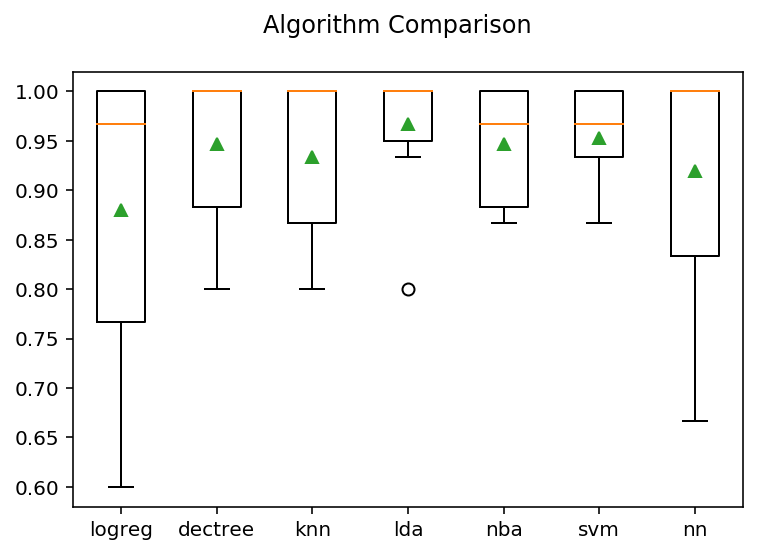

In [81]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results, showmeans=True, showcaps=True, showfliers= True) 
ax.set_xticklabels(names)
plt.show()